In [3]:
# AUTHOR: Torben Guijarro, CID:01984901

import sys, os, time
import numpy as np 
import scipy.io as io 
import matplotlib.pyplot as plt
from scipy.signal import correlate #for autocorrelation plots
from scipy.spatial.distance import pdist, squareform #for the recurrence plot
from sklearn.decomposition import PCA #for PCA analysis

In [4]:
# %% Load dataset, https://www.biorxiv.org/content/10.1101/2020.10.18.344184v1.abstract

# Should load behavioural data (x and y position, radial position and angle 
# phi in function of time fluorence time series dfonf -> provides a matric of 
# fluorescence intensities with matrix dimensions Cells x Time-Duration
datadir = 'data/data/dataset3_m62/'
trackdata = io.loadmat(datadir+'downTrackdata.mat')
phi = trackdata['phi']; x = trackdata['x']; y = trackdata['y']; r=trackdata['r'];
speed = trackdata['speed']; t = trackdata['time'];
spikedata = io.loadmat(datadir+'spikes.mat')
spikes = spikedata['spikes']
params = spikedata['params']
fluodata = io.loadmat(datadir+'fissa_output.mat')
dfonf = fluodata['ddf_f']

In [5]:
params

array([[(array([[30.9]]), array([[1]], dtype=uint8), array([[85]], dtype=uint8), array([[1]], dtype=uint8), array([[0.99]]))]],
      dtype=[('fr', 'O'), ('decay_time', 'O'), ('bl_prctile', 'O'), ('spk_SNR', 'O'), ('lam_pr', 'O')])

In [27]:
# Let us divide the time data into recordings by index.

idx = [i+1 for i in range(0, len(t)-1) if t[i] > t[i+1]]
print(idx)

idx_dict = {"idx_recording{}".format(i+2):idx[i] for i in range(len(idx))}
print(idx_dict)


[7420, 14840, 22260, 29680, 37100]
{'idx_recording2': 7420, 'idx_recording3': 14840, 'idx_recording4': 22260, 'idx_recording5': 29680, 'idx_recording6': 37100}


The experiment consists of 6 recordings, each 4 minutes long. Therefore the total amount of recorded time is 1440 seconds (6x4x60s). We will use the variable "time" to represent the sampled 1400s with a frequency of 30.9Hz.

In [28]:
# Let us normalise our time data so that the values increase from 0 to 1440 seconds. For this we divide each time
# recording by the frequency (30.9Hz)

fq = 30.9
time = [i/fq for i in range(len(t))] 

# Question 1

(a)	Plot the fluorescence time series for cell 1 
(b) As a subplot with the same time axis but different vertical axis, plot the angular position of the mouse as a function of time.

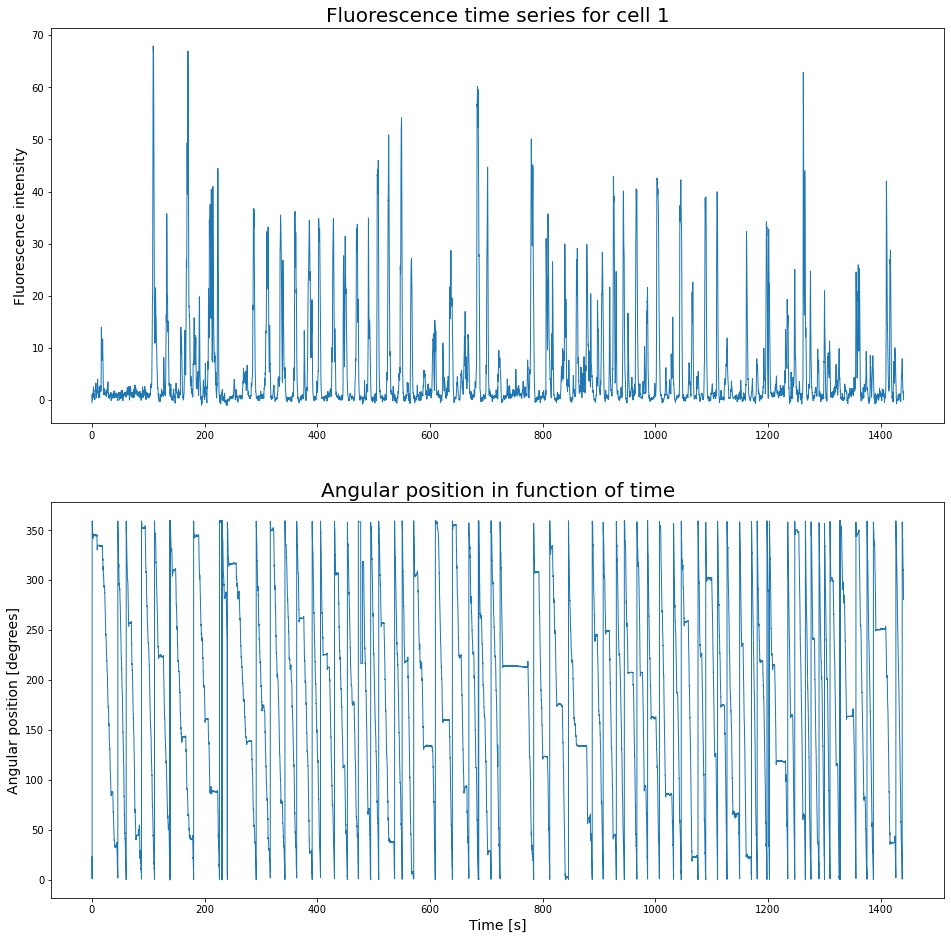

In [8]:
# We need to plot the time series for cell 1, let,
cell_1 = dfonf[1,:]

plt.figure(1,figsize=(16,16))
plt.clf()
plt.title('Fluorenscence time series and radial position in function of time')
# plotting fluorescence time series
plt.subplot(2,1,1)
plt.plot(time,cell_1,linewidth=1) 
plt.title('Fluorescence time series for cell 1',fontsize=20)
plt.ylabel('Fluorescence intensity',fontsize=14) 

plt.subplots_adjust(hspace=0.2)

# plotting angular position in function of time
plt.subplot(2,1,2)
plt.plot(time,phi,linewidth=1)
plt.title('Angular position in function of time',fontsize=20)
plt.xlabel('Time [s]',fontsize=14)  
plt.ylabel('Angular position [degrees]',fontsize=14)   #UNITS CHECK
plt.show()

The first plot displays the fluorescence instensity in function of the sampled time. The signal shows a series of peaks which indicate cellular activity. The second plot displays the angular position of the mouse over the sampled time. The signal resembles a saw tooth as the mouse completes the circular runs. Therefore, the values go from 0 to 360 degrees and back to 0 when the loop is completed. Nevertheless, we observe that the angular position instantly transitions from 0 to 360 degrees and then gradually lowers from 360 degrees to 0. Therefore, overall, the mouse ran clockwise. Moreover, when the signal is constant the mouse is still. Finally, when comparing the two plots, when the mouse is still (for e.g. at around 750s or 1400s) or when it slows down (e.g. 250s or 570s), the fluorescence intensity lowers and there are no peaks. These observations concord that the cell is spacially tuned.   

(c) Plot the trajectory of the mouse in space (Cartesian coordinates) throughout the duration of the recording

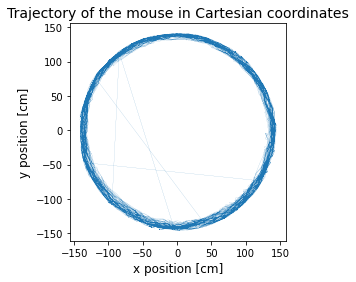

In [9]:
plt.figure(2)
plt.clf()
plt.plot(x,y,linewidth='0.1')
plt.title('Trajectory of the mouse in Cartesian coordinates', fontsize=14)
plt.xlabel('x position [cm]', fontsize=12)  
plt.ylabel('y position [cm]', fontsize=12)  
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

The plot shows that the mouse runs in circles. The jumps seen in the graph, i.e the straigth lines, correspond to the concatenation of two different recordings and the fact that the position of the mouse changed instantly. We should see 5 straight lines, but only 4 of them are visible. Therefore, the final position of the mouse in one recording was very similar to the starting position in the next recording.

(d)	Plot the average response of this cell at each angular position phi.

In [10]:
import pandas as pd #import panda
df = pd.DataFrame(phi) #data frame for phi
df.columns = ['phi'] #column label
df['cell_1'] = pd.Series(cell_1[:]) #second column with cell_1 data
df

,phi,cell_1
0,23.054994,-0.507769
1,17.874196,-0.278860
2,11.514089,-0.033555
3,10.596432,0.212766
4,10.015967,0.444456
...,...,...
44515,287.873165,1.250243
44516,286.320611,1.002798
44517,284.799083,0.712040
44518,283.636032,0.394180


Text(0, 0.5, 'Fluorescence intensity')

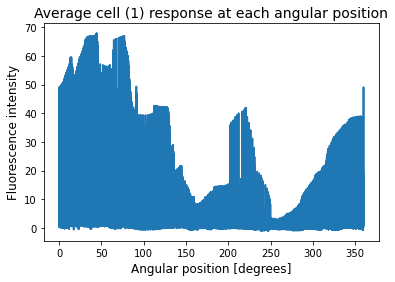

In [29]:
#df.groupby('phi')['cell_1'].hist() #data frame, group the data and mean
df.groupby('phi')['cell_1'].mean().plot() #data frame, group the data and mean
#df.plot.scatter(x='phi', y='cell_1',c='DarkBlue') #scatter plot
plt.plot(df.groupby('phi')['cell_1'].mean(),c='tab:blue')#data frame, group the data and mean
plt.title('Average cell (1) response at each angular position', fontsize=14)
plt.xlabel('Angular position [degrees]', fontsize=12)  
plt.ylabel('Fluorescence intensity', fontsize=12)  


Text(0.5, 1.05, 'Average cell (1) response at each angular position')

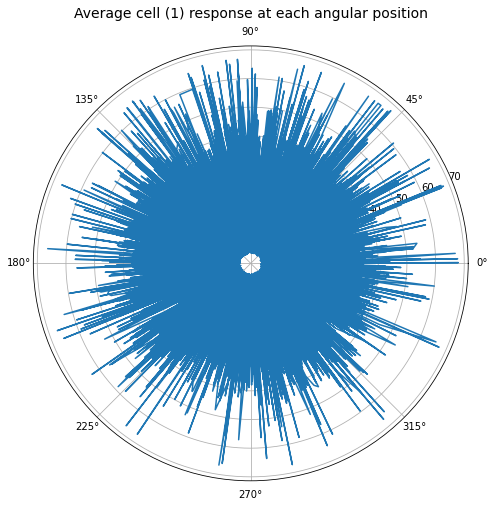

In [12]:
# Attemp of another plot, using a polar chart
fig = plt.figure(figsize=(8,8))
plt.polar(df.groupby('phi')['cell_1'].mean())
plt.title('Average cell (1) response at each angular position', fontsize=14)

# This plot shows that the cell response varies with the angle but is misleading to interpret which angles have higher
# responses.

For the average cell response, we used the raw data of cell_1, and with panda lib, built a Dataframe of two columns with the angle phi and the cell intensity. We used the .groupby method to group by the value of phi (angle), taking the average fluorescence response. Both plots show that the cell response is not the same depending on the angle. Furthermore, the first plot shows there is larger activity from 0 to 150 degrees than 150 to 360. These results show that the cell response is sensitive to the spacial position of the mouse.  

# Question 2
Produce a delay embedding, with m=2, for this cell. Choose a time lag tau that shows the dynamics of the calcium transient appropriately. 

We will first proceed by the autocorrelation function

In [30]:
dfonf_1 = cell_1
#print('dfonf_1: {}'.format(dfonf_1))

dfonf_1_mean = np.mean(dfonf_1)
#print('Cell 1 mean: {}'.format(dfonf_1_mean))

dfonf_cor = dfonf_1-dfonf_1_mean #substracts the mean to get the embedding centred at the zero crossing
#print('dfonf_cor: {}'.format(dfonf_cor))

# In order to choose the correct window size let us examine the standard deviation of our signal. 
dfonf_1_std = np.std(dfonf_1)
dfonf_1_var = np.var(dfonf_1)
print('Cell 1 standard deviation: {}'.format(dfonf_1_std))
print('Cell 1 variance: {}'.format(dfonf_1_var))

# These results will enable us to determine the window size for smoothing. 

Cell 1 standard deviation: 9.534170554659577
Cell 1 variance: 90.90040816533771


Text(0, 0.5, 'Autocorrelation')

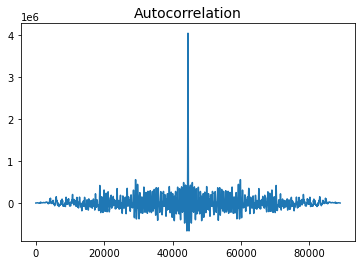

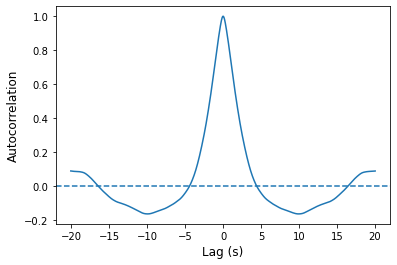

In [33]:
# We will proceed with the autocorrelation function from the spicy.signal library.
autocorrelation = correlate(dfonf_cor,dfonf_cor)
#print('autocorrelation: {}'.format(autocorrelation))

plt.figure(4)
plt.clf()
plt.title('Autocorrelation', fontsize=14)
plt.plot(autocorrelation)

# normalise the autocorrelation function
normalised_autocor = autocorrelation/np.max(autocorrelation) #normalized over the maximum of the fct
ctr = int(np.floor(np.size(normalised_autocor)/2))
w=20*31 
idx_autocorr = range(ctr-w, ctr+w)
autocorr_ = autocorrelation[idx_autocorr]
normalised_autocor_ = normalised_autocor[idx_autocorr]
t_autocorr = np.arange(0-w/fq, 0+w/fq,1/fq)

plt.figure(5)
plt.clf()
plt.plot(t_autocorr,normalised_autocor_)
plt.axhline(linestyle='--')
plt.xlabel('Lag (s)', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)

In [34]:
# We will now examine when the zero crossing happens in order to choose the best tau. 

cross_zero = 100000 #Set it to a high value as we look for a minimum
for i in range(0, len(t_autocorr)-1):
    if abs(normalised_autocor_[i]) <= 0.01:
        if abs(t_autocorr[i]) <= cross_zero:
            cross_zero=abs(t_autocorr[i])
print('Value of tau at zero crossing point: {}'.format(cross_zero))

Value of tau at zero crossing point: 4.336569579286898


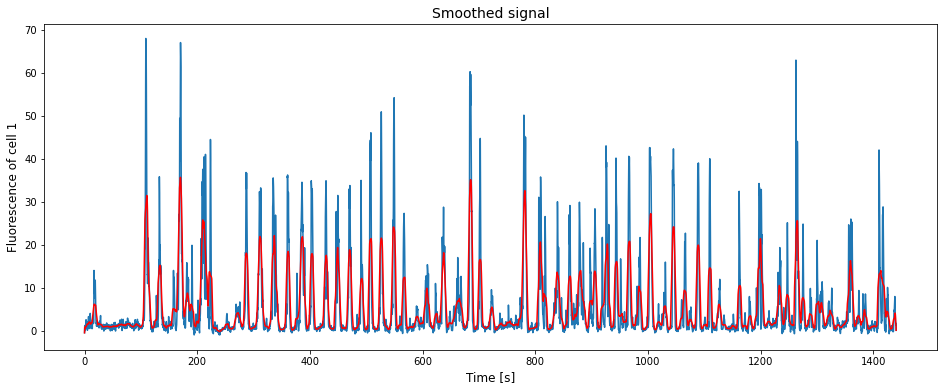

In [38]:
# We will now smooth the signal

def smooth(a,WSZ):
    # a: NumPy 1-D array containing the data to be smoothed
    # WSZ: smoothing window size needs, which must be odd number,
    # as in the original MATLAB implementation
    out0 = np.convolve(a,np.ones(WSZ,dtype=int),'valid')/WSZ    
    r = np.arange(1,WSZ-1,2)
    start = np.cumsum(a[:WSZ-1])[::2]/r
    stop = (np.cumsum(a[:-WSZ:-1])[::2]/r)[::-1]
    return np.concatenate((  start , out0, stop  ))

# %% 
cell_1_sm = smooth(cell_1,201)
plt.figure(6, figsize=(16,6))
plt.clf()
plt.plot(time,cell_1)
plt.plot(time,cell_1_sm, 'r')
plt.title('Smoothed signal', fontsize=14)
plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('Fluorescence of cell 1', fontsize=12)
plt.show()

In [44]:
# We will the define the embedding function:

def embedding(dfonf_cell, sbplt, tau):
    L=len(dfonf_cell)
    tau_=int(np.floor(tau*fq)) # we use the largest integer
    idx_x=range(0,L-tau_)
    idx_y=range(tau_,L)
    plt.figure(7, figsize=(12,40))
    plt.clf()
    plt.subplot(6,1,sbplt)
    plt.plot(dfonf_cell[idx_x],dfonf_cell[idx_y],'-', color='k', linewidth=0.5)
    plt.title(('Embedding with tau={}'.format(tau)), fontsize=16)
    plt.xlabel('Fluorescence at time t', fontsize=14)
    plt.ylabel('Fluorescence at time t-tau', fontsize=14)
    plt.show()

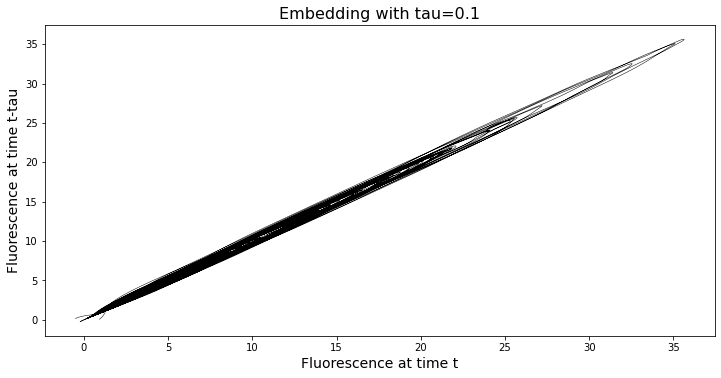

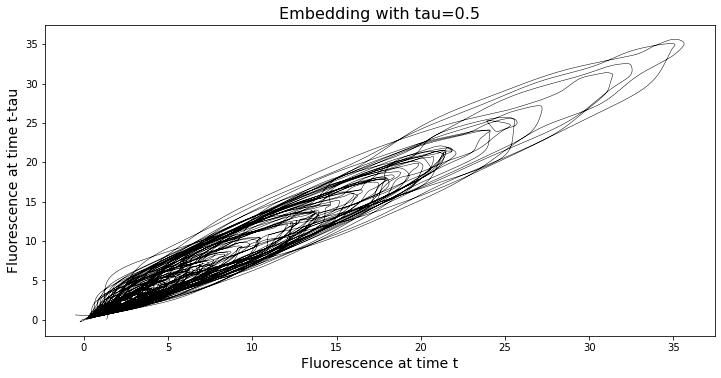

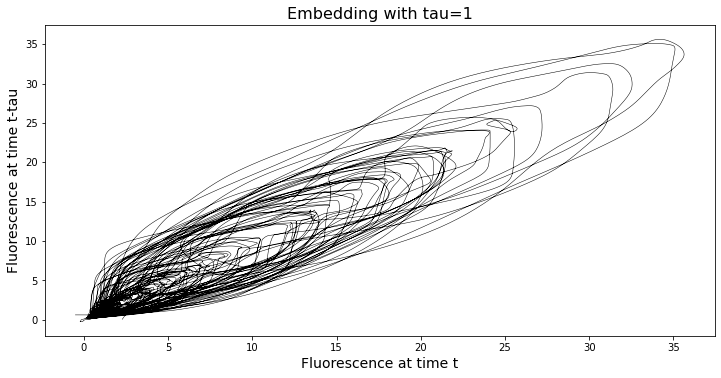

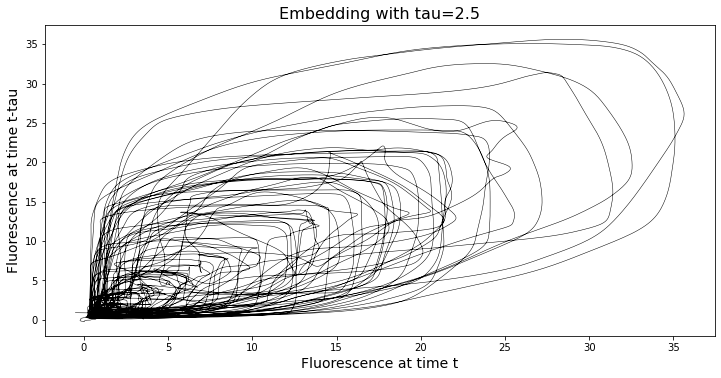

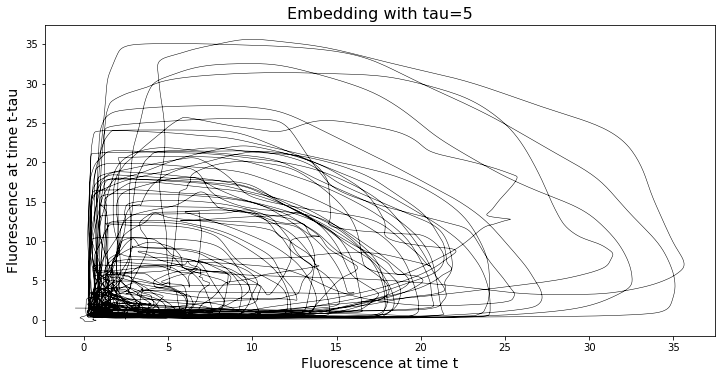

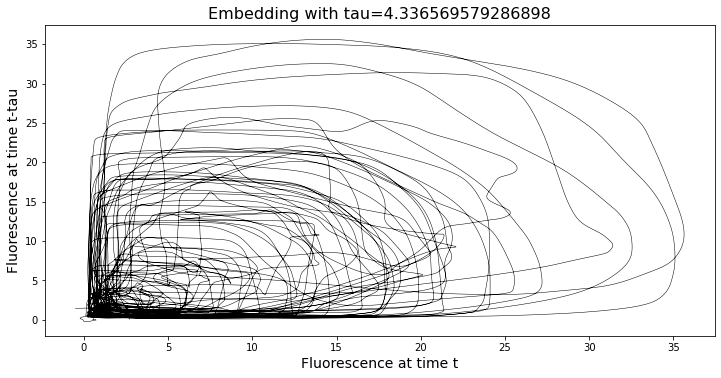

In [48]:
# We will first observe the calcium dynamics with different values of tau
# Then, using the autocorrelation function we obtained the best value of tau (~4.34)
tau = [0.1, 0.5, 1, 2.5, 5, 4.336569579286898]
sbplt = range(1,7)

# using the smoothed signal
for pair in zip(sbplt, tau):
    embedding(cell_1_sm, pair[0], pair[1])

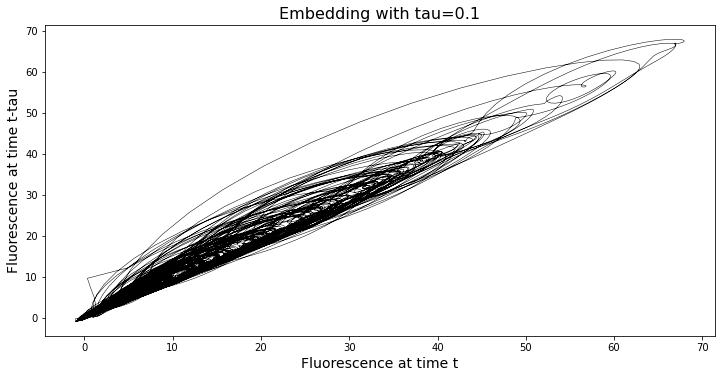

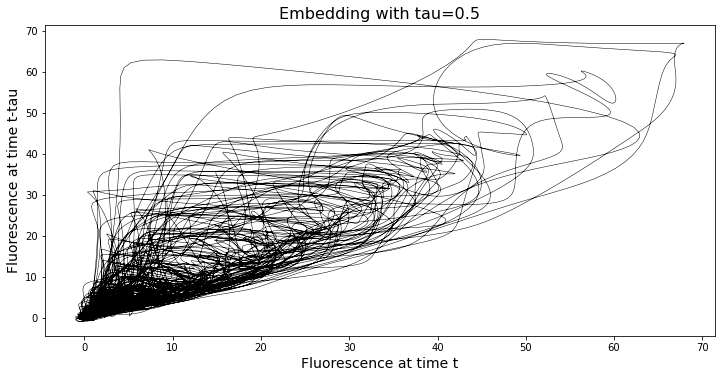

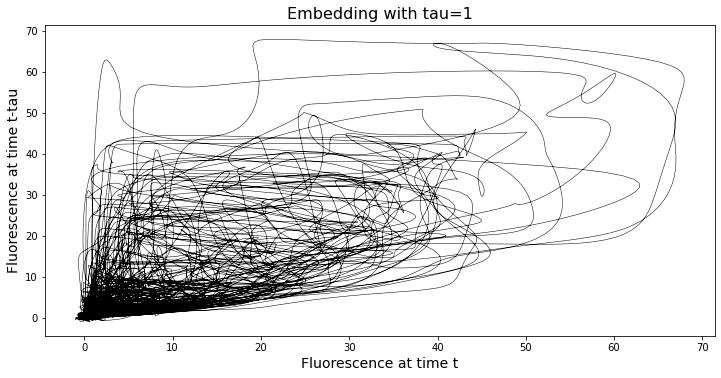

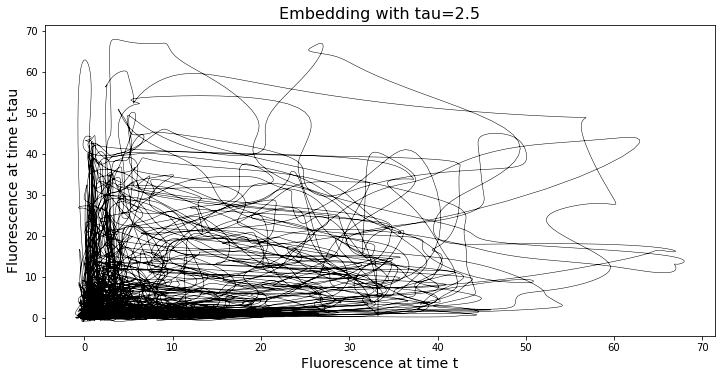

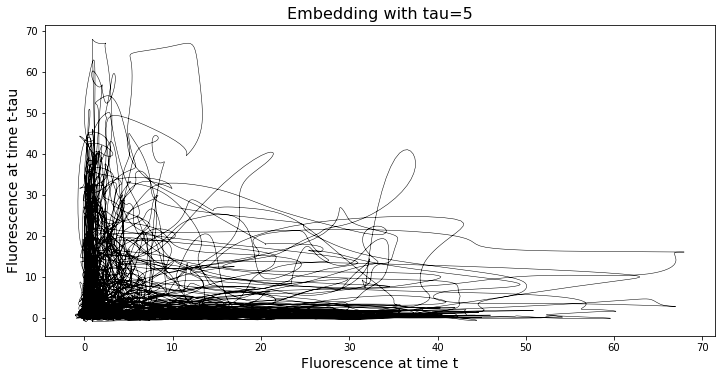

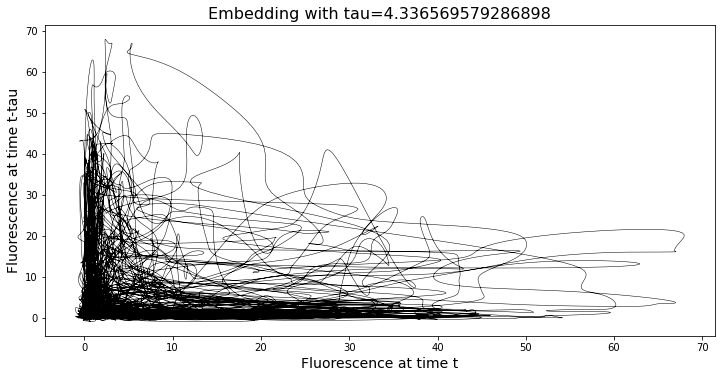

In [49]:
# using the raw signal
for pair in zip(sbplt, tau):
    embedding(cell_1, pair[0], pair[1])

The calcium transcient is shown by the fluorescence intensity of the cell. From these plots we can observe that major differences occur between the smoothed and the raw signal, as the amplitude nearly lowers by half. Moreoverm we can estimate that every loop corresponds to a spike in the fluorescence time series for cell 1. This can be confirmed as the loops using the raw signal reach the same amplitude as the spikes (approx. 68). A time lag tau of (approx. 4.34s) enables to properly visualise these loops.

# Question 3
Make a recurrence plot of the activity of this same cell, and explain the features you see in the plot. Choose an appropriate tolerance epsilon to see meaningful structure in the data.

In [47]:
def rec_plot(s, eps, steps):
    d = pdist(s[:,None])
    d = np.floor(d/eps)
    d[d>steps] = steps
    Z = squareform(d)
    return Z

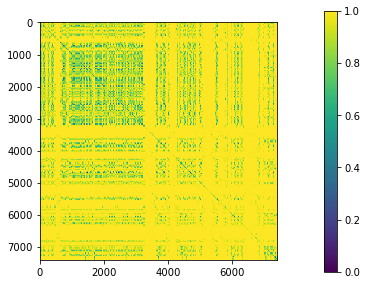

In [50]:
# Due to computational capacity, we decided to only plot the first recording.
r = cell_1[0:7420] # first recording
eps = [0.1, 0.5, 1]
steps = [1, 2, 4]

recurrence = rec_plot(r,0.1,1) 
plt.figure(8, figsize=(6,6))
plt.clf()
plt.imshow(recurrence)
cbar = plt.colorbar(shrink=0.8, pad = 0.14)

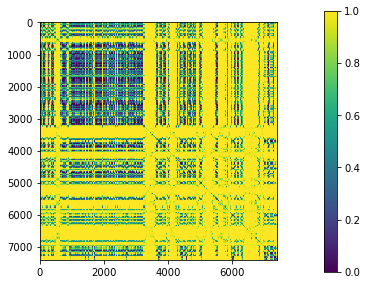

In [51]:
recurrence = rec_plot(r,0.5,1) 
plt.figure(9, figsize=(6,6))
plt.clf()
plt.imshow(recurrence)
cbar = plt.colorbar(shrink=0.8, pad = 0.14)

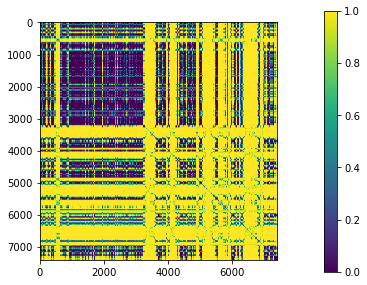

In [52]:
recurrence = rec_plot(r,1,1) 
plt.figure(8, figsize=(6,6))
plt.clf()
plt.imshow(recurrence)
cbar = plt.colorbar(shrink=0.8, pad = 0.14)

Due to computational demand, a loop could not be used. Otherwise, we could use the following,
r = cell_1[0:7420] # first recording
eps = [0.1, 0.5, 1]
steps = [1, 2, 4]

for ep in eps:
    for st in steps:
        recurrence = rec_plot(r, ep, st)
        plt.plot(recurrence)

Due to computational demand we only plotted the first recording of the cell (frist 4 minutes, index 7420). We used different values of epsilon and a constant step (equal to 1, so similar to a heavyside). If we had more space we could change the values of the steps in order to observe more specific differences. The regions that are brighter (yellow) show similarity in the values while the darker parts show differences in the values. These brighter parts are the intersection between signals that are similar, either very low activity or very high activity.

# Question 4
Plot the activity of the whole population of neurons over time as an image with dimensions Cells x Time

Text(0, 0.5, 'Neuron firing intensity in log scale')

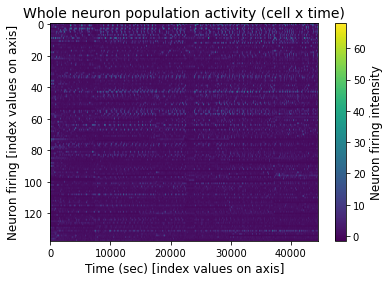

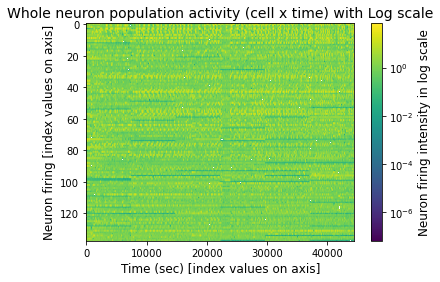

In [415]:
# plotting whole neuron population activity, Cells x Time
plt.figure(8)
plt.clf()
plt.imshow(dfonf,aspect='auto')
cbar = plt.colorbar()
plt.title('Whole neuron population activity (cell x time)', fontsize=14)
plt.xlabel('Time (sec) [index values on axis]', fontsize=12)
plt.ylabel('Neuron firing [index values on axis]', fontsize=12)
cbar.ax.set_ylabel('Neuron firing intensity', fontsize=12)

# now using logaritmic scale
from matplotlib.colors import LogNorm
# plotting whole neuron population activity, Cells x Time
plt.figure(9)
plt.clf()
plt.imshow(dfonf,norm=LogNorm(),aspect='auto')
plt.title('Whole neuron population activity (cell x time) with Log scale', fontsize=14)
plt.xlabel('Time (sec) [index values on axis]', fontsize=12)
plt.ylabel('Neuron firing [index values on axis]', fontsize=12)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Neuron firing intensity in log scale', fontsize=12)

The plotting of the neural population against time confirms the observations made before. The lighter parts correspond to the spikes in cell fluorescence intensity during the experiment.

Using Principal Components Analysis (PCA), produce a 3-dimensional embedding of the neural population activity

In [365]:
# creating PCA object

X=dfonf.T #we need a shape of Observations (Time) x Dimensions (Cells)
pca = PCA(n_components=3) # =3 takes the first components, 3 first "important" eigenvectors
X_pca = pca.fit_transform(X)
print('Eigenvalues: {}'.format(pca.explained_variance_))

# to understand how much variance is explained do a PCA with all components
pca_all = PCA() # 138 components
X_pca_all = pca_all.fit_transform(X)

print('Explained variance:')
for i in range(len(pca.explained_variance_)):
    print(pca.explained_variance_[i]/sum(pca_all.explained_variance_))

Eigenvalues: [240.66719746 186.91887395 132.41514741]
Explained variance:
0.15503806738966588
0.120413339588469
0.08530198034621943


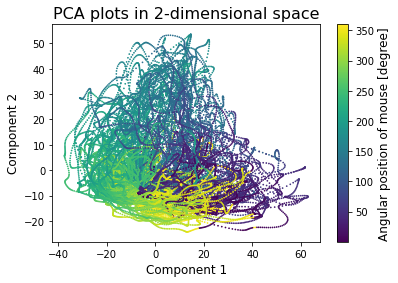

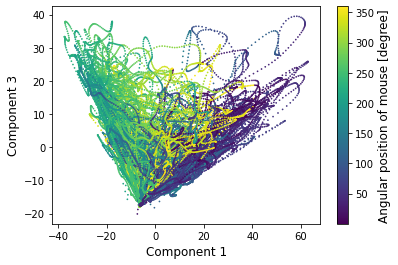

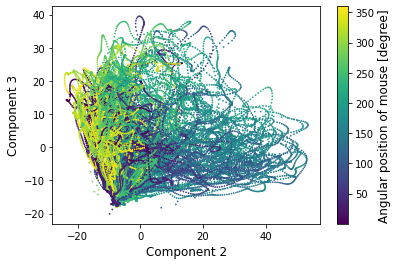

In [395]:
### plot components ###

plt.scatter(X_pca[:,0], X_pca[:,1], c=phi, s=0.5)
plt.title("PCA plots in 2-dimensional space", fontsize=16)
plt.xlabel('Component 1', fontsize=12)
plt.ylabel('Component 2', fontsize=12)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Angular position of mouse [degree]', fontsize=12)
plt.show()

plt.scatter(X_pca[:,0], X_pca[:,2], c=phi, s=0.5)
plt.xlabel('Component 1', fontsize=12)
plt.ylabel('Component 3', fontsize=12)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Angular position of mouse [degree]', fontsize=12)
plt.show()

plt.scatter(X_pca[:,1], X_pca[:,2], c=phi, s=0.5)
plt.xlabel('Component 2', fontsize=12)
plt.ylabel('Component 3', fontsize=12)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Angular position of mouse [degree]', fontsize=12)
plt.show()

Text(0, 0.5, 'Angular position of mouse [degree]')

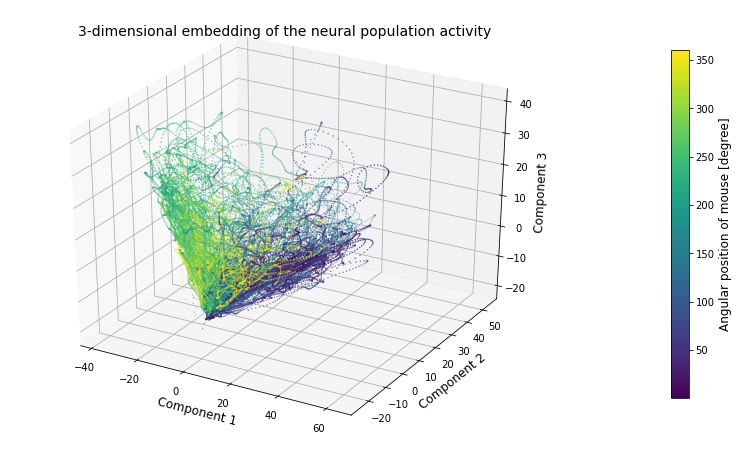

In [391]:
# 3D plot

fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection='3d')
p = ax.scatter3D(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=phi, s=0.2)
ax.set_title('3-dimensional embedding of the neural population activity', fontsize=14)
ax.set_xlabel('Component 1', fontsize=12)
ax.set_ylabel('Component 2', fontsize=12)
ax.set_zlabel('Component 3', fontsize=12)
cbar = fig.colorbar(p,shrink=0.8, pad = 0.14)
cbar.ax.set_ylabel('Angular position of mouse [degree]', fontsize=12)

The Principal Component Analysis of our data confirm that depending on the spacial positioning of the mouse, a different intensity will be observed. The fluorescence expression is spacially dependent. This can be seen especially in 1st component against 2nd component. The areas are divided depending on the angle. PCA reduces noise. 
Furthermore, it introduces the concept of neural activity population and neural manifolds. The PCA clearly show thanks to the color grade, that the cell intensity varies and is similar in space. In a way, their are blocks of cell intensity depending on position on the mice.